Name : Swetha Kumar.

Date : 04-08-2024.

Project : Fashion MNIST.



# APPROACHES:

Load the data and libraries.

Data Visualization.

Divide the data into X(images) and Y(Lables).

Divide the data into train and test.

Single layer perceptron and Evaluate.

Apply the multi layer perceptron and Evaluate.

Implement Deep Learning using TensorFlow and Keras.

### Load the data's and libraries:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron

In [87]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.skew()

,0
label,0.000000
pixel1,143.091194
pixel2,90.419440
pixel3,127.905289
pixel4,44.613085
pixel5,30.254078
pixel6,23.536165
pixel7,15.395735
pixel8,8.926890
pixel9,5.319586


### Splitting the Data:

In [13]:
x = train.drop('label', axis=1)
y = train['label']

In [14]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


### Splitting the data into Test and Train Data:

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 123)

In [90]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


### SINGLE LAYER PERCEPTRON:

In [17]:
from sklearn.linear_model import Perceptron

per = Perceptron()
per.fit(x_train, y_train)
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

In [23]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [24]:
model_eval(y_train, y_hat_train_per)

The accuracy of the model is: 0.83
[[4178   12  119  189   97    0  198    0   67    0]
 [  12 4590   23   90   39    0    2    0    3    0]
 [  62    5 3497   60 1076    0   54    0   34    0]
 [ 167   45   48 4214  327    0   31    2   16    1]
 [  13    4  248  105 4426    0   40    1   13    0]
 [  27    3   42   12   16 3775    9  638  134  120]
 [ 769    9  731  191 1471    0 1513    1  106    1]
 [   0    0    1    0    0   13    0 4680   18   61]
 [  18    1   48   52   80    2   17   22 4533    3]
 [   7    2    5    1    2   26    1  339    9 4383]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4860
           1       0.98      0.96      0.97      4759
           2       0.73      0.73      0.73      4788
           3       0.86      0.87      0.86      4851
           4       0.59      0.91      0.71      4850
           5       0.99      0.79      0.88      4776
           6       0.81      0.32      0.45      4792
 

In [25]:
model_eval(y_test, y_hat_test_per)

The accuracy of the model is: 0.81
[[ 968    5   29   51   23    1   48    1   14    0]
 [   5 1176   11   32   13    0    1    0    2    1]
 [   8    1  872   21  279    0   21    0   10    0]
 [  55   14   17  958   92    0    7    1    4    1]
 [   4    1   71   35 1020    0   16    0    3    0]
 [   5    1   14    1    4  936    5  181   41   36]
 [ 207    1  199   41  382    0  341    1   35    1]
 [   0    0    0    0    0    3    0 1204    1   19]
 [   3    0    6   20   22    1    7   10 1155    0]
 [   7    0    1    1    0    8    0  104    2 1102]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1140
           1       0.98      0.95      0.96      1241
           2       0.71      0.72      0.72      1212
           3       0.83      0.83      0.83      1149
           4       0.56      0.89      0.68      1150
           5       0.99      0.76      0.86      1224
           6       0.76      0.28      0.41      1208
 

CONCLUSION:

Single Layer Perceptron results in HIGH BIAS and HIGH VARIANCE.

### MULTI LAYER PERCEPTRON:

In [91]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (64,64,64), random_state=10, verbose = 1)
#Eventhough increasing the hidden layer size the training loss did'nt improve 0.0001% , so it is not required to further deal with layer size.
mlp.fit(x_train, y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.60098177
Iteration 2, loss = 0.72331256
Iteration 3, loss = 0.59342980
Iteration 4, loss = 0.53215677
Iteration 5, loss = 0.48334242
Iteration 6, loss = 0.45461304
Iteration 7, loss = 0.43142469
Iteration 8, loss = 0.42017151
Iteration 9, loss = 0.40041187
Iteration 10, loss = 0.39245965
Iteration 11, loss = 0.37796074
Iteration 12, loss = 0.37314505
Iteration 13, loss = 0.36754031
Iteration 14, loss = 0.36451711
Iteration 15, loss = 0.36327486
Iteration 16, loss = 0.34666544
Iteration 17, loss = 0.34294634
Iteration 18, loss = 0.33086410
Iteration 19, loss = 0.34254179
Iteration 20, loss = 0.32573463
Iteration 21, loss = 0.32571811
Iteration 22, loss = 0.31512881
Iteration 23, loss = 0.31630397
Iteration 24, loss = 0.31205375
Iteration 25, loss = 0.31160782
Iteration 26, loss = 0.30586170
Iteration 27, loss = 0.29749988
Iteration 28, loss = 0.29832119
Iteration 29, loss = 0.29837811
Iteration 30, loss = 0.29148997
Iteration 31, loss = 0.29556415
Iteration 32, los

In [34]:
model_eval(y_train, y_hat_train_mlp)

The accuracy of the model is: 0.95
[[4571    0   22   15    8    0  234    0   10    0]
 [   9 4728    3    8    3    0    8    0    0    0]
 [  50    0 4354   10  219    0  147    0    8    0]
 [ 115    1   19 4546  103    1   64    0    2    0]
 [   8    2  297   44 4398    0   90    0   11    0]
 [   0    0    0    0    0 4737    0   32    1    6]
 [ 275    0  253   32  212    0 4005    0   15    0]
 [   0    0    0    0    0    3    0 4716    0   54]
 [   1    0    2    0    0    0    9    0 4764    0]
 [   0    0    0    0    0    1    0    8    0 4766]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4860
           1       1.00      0.99      1.00      4759
           2       0.88      0.91      0.89      4788
           3       0.98      0.94      0.96      4851
           4       0.89      0.91      0.90      4850
           5       1.00      0.99      1.00      4776
           6       0.88      0.84      0.86      4792
 

In [35]:
model_eval(y_test, y_hat_test_mlp)

The accuracy of the model is: 0.87
[[ 950    5   21   14    3    1  137    0    9    0]
 [   7 1195    7   18    7    0    4    0    2    1]
 [  24    1  971   15  109    1   84    0    7    0]
 [  69   17   15  957   53    1   31    0    4    2]
 [   8    2  123   35  912    1   61    0    8    0]
 [   0    1    0    0    0 1168    0   28    9   18]
 [ 175    1  117   21   87    0  781    0   26    0]
 [   2    0    0    1    0   12    1 1148    3   60]
 [   8    0    5    4    0    2   13    4 1187    1]
 [   0    2    0    1    0    6    0   43    1 1172]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1140
           1       0.98      0.96      0.97      1241
           2       0.77      0.80      0.79      1212
           3       0.90      0.83      0.86      1149
           4       0.78      0.79      0.79      1150
           5       0.98      0.95      0.97      1224
           6       0.70      0.65      0.67      1208
 

CONCLUSION:

Multi Layer Perceptron results in LOW BIAS and HIGH VARIANCE.

### TENSORFLOW APPROACH:

Approach to kearsa and tensorflow:

Load the data and libraries.

Declare the model:

* Sequential: Sequencde of layers.

* Functional: Multi Modal/ Transfer Learning.

Declare the layers:

 * Dense, Dropout.

 * Number of neurons, Act funtion.

Compile the model:

 * Optimizer(SGD, Adam).

 * loss function(Cross Entropy, MSE, RMSE).

 * Metrics(Accuracy, Precision, Recall).

Fit the Model:

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

In [33]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Declare Models and Layers:

In [44]:
# In tensorflow we can able to mention the input size but in sklearn we can't.
# We can also mention the activation function.
#Softmax actFun uses ohe so moslty prefered in the output layer.
model = Sequential()

#Dense define multi layer perceptron.

model.add(Dense(256, activation = 'relu', input_shape = (784,))) #Layer1 and Input layer
model.add(Dropout(0.2))# dropout layer
#0.2 = 20 % of data dropout .

model.add(Dense(256, activation = 'relu'))# Layer1
model.add(Dropout(0.2))# dropout layer

model.add(Dense(256, activation = 'relu'))# Layer 2
model.add(Dropout(0.2))# dropout layer

model.add(Dense(256, activation = 'relu'))# Layer 3
model.add(Dropout(0.2))# dropout layer

model.add(Dense(10, activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# To know the summary of the data.
#Every param goes forward and backward pass
#input 784* 64 1st hidden layers + 64 bias = 50240
#64 1st hidden * 64 2nd hidden + 64 bias = 4160
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model:

In [46]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Fitting the Model:

In [50]:
hist = model.fit(x_train, y_train_ohe, batch_size = 128,
                 epochs = 100, validation_data = (x_test, y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5294 - loss: 7.5234 - val_accuracy: 0.7653 - val_loss: 0.6568
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7199 - loss: 0.7935 - val_accuracy: 0.7972 - val_loss: 0.5987
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7576 - loss: 0.6714 - val_accuracy: 0.8169 - val_loss: 0.5214
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7790 - loss: 0.5990 - val_accuracy: 0.8209 - val_loss: 0.4669
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7951 - loss: 0.5492 - val_accuracy: 0.8346 - val_loss: 0.4698
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8061 - loss: 0.5237 - val_accuracy: 0.8381 - val_loss: 0.4305
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8092 - loss: 0.5150 - val_accuracy: 0.8451 - val_loss: 0.4348
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8197 - loss: 0.4883

In [51]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [52]:
hist.history['accuracy']

[0.6160416603088379,
 0.7333750128746033,
 0.7642708420753479,
 0.7840833067893982,
 0.797124981880188,
 0.807645857334137,
 0.8146041631698608,
 0.8207499980926514,
 0.8294791579246521,
 0.832645833492279,
 0.8350833058357239,
 0.8371666669845581,
 0.840791642665863,
 0.8434374928474426,
 0.846791684627533,
 0.8447916507720947,
 0.846708357334137,
 0.8521666526794434,
 0.8452083468437195,
 0.848604142665863,
 0.8532083630561829,
 0.8541041612625122,
 0.8550208210945129,
 0.8574583530426025,
 0.8585625290870667,
 0.8586666584014893,
 0.8612708449363708,
 0.8612708449363708,
 0.8600624799728394,
 0.8609583377838135,
 0.8599166870117188,
 0.862666666507721,
 0.8598333597183228,
 0.8651458621025085,
 0.8635416626930237,
 0.8688958287239075,
 0.8667708039283752,
 0.8648750185966492,
 0.8641666769981384,
 0.8626041412353516,
 0.8554583191871643,
 0.8578125238418579,
 0.8574166893959045,
 0.8622291684150696,
 0.8656041622161865,
 0.8661041855812073,
 0.8646458387374878,
 0.8681041598320007,


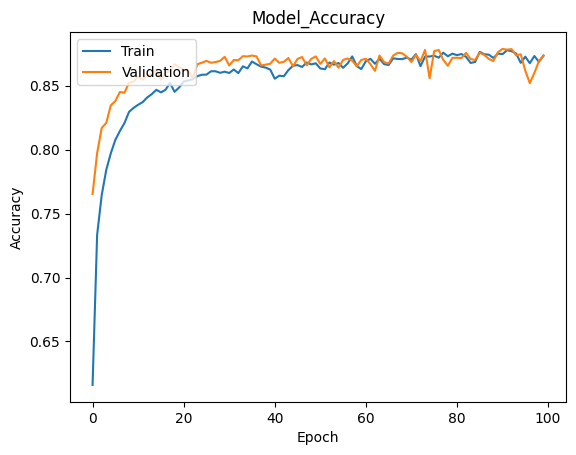

In [53]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# To get more accuracy neurons are added to them but overfitting happens so overcome it we use dropout.

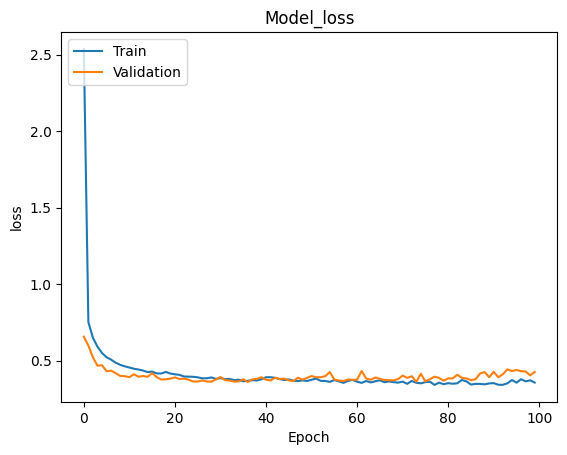

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

### Model Evaluation:

In [55]:
y_hat_train_dense = np.argmax(model.predict(x_train), axis =1)
y_hat_test_dense = np.argmax(model.predict(x_test), axis=1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [56]:
y_hat_test_dense

array([2, 4, 1, ..., 2, 2, 6])

In [57]:
y_hat_train_dense

array([7, 4, 7, ..., 9, 2, 8])

In [58]:
model_eval(y_train, y_hat_train_dense)

The accuracy of the model is: 0.9
[[3763    3   17  111   14    0  939    0   13    0]
 [   0 4714    0   29    5    0   11    0    0    0]
 [   9    2 4038   26  475    0  233    0    5    0]
 [  30   10    9 4522  203    0   77    0    0    0]
 [   0    4  605   80 3972    0  182    1    6    0]
 [   0    0    0    0    0 4769    0    5    0    2]
 [ 244    4  456   81  665    0 3326    0   16    0]
 [   0    0    0    0    0    4    0 4716    0   53]
 [   0    0    9    7   18    0   44    2 4696    0]
 [   0    0    0    0    0   21    0  106    0 4648]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      4860
           1       1.00      0.99      0.99      4759
           2       0.79      0.84      0.81      4788
           3       0.93      0.93      0.93      4851
           4       0.74      0.82      0.78      4850
           5       0.99      1.00      1.00      4776
           6       0.69      0.69      0.69      4792
  

In [59]:
model_eval(y_test, y_hat_test_dense)

The accuracy of the model is: 0.87
[[ 834    5    8   33    6    0  250    0    4    0]
 [   2 1213    0   18    3    0    4    0    1    0]
 [   2    1  990   16  137    0   65    0    1    0]
 [  18   13    5 1020   65    0   27    0    1    0]
 [   0    2  163   32  908    0   44    0    1    0]
 [   0    0    0    0    0 1189    0   26    5    4]
 [  74    4  127   22  167    0  803    0   11    0]
 [   0    0    0    0    0   16    0 1178    2   31]
 [   0    0    4    4    8    0   12    6 1190    0]
 [   0    0    0    0    0   15    0   50    1 1159]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1140
           1       0.98      0.98      0.98      1241
           2       0.76      0.82      0.79      1212
           3       0.89      0.89      0.89      1149
           4       0.70      0.79      0.74      1150
           5       0.97      0.97      0.97      1224
           6       0.67      0.66      0.67      1208
 

### VISUALIZATION:

In [79]:
x_test = test.drop(columns=['label'])

In [80]:
x_test = x_test / 255.0

In [81]:
x_test = x_test.values.reshape(-1, 28, 28, 1)

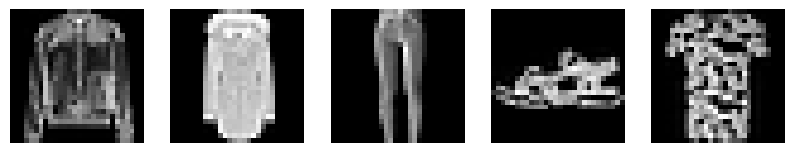

In [84]:
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.axis('off')